In [1]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
data=pd.read_csv("Mall_Customers.csv")

In [3]:
#first 5 rows in the dataframe
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#finding the number of rows and columns
data.shape

(200, 5)

In [5]:
#desribe the dataset
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
#check the data type of the dataset
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [7]:
#checking for the missing value
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<AxesSubplot:>

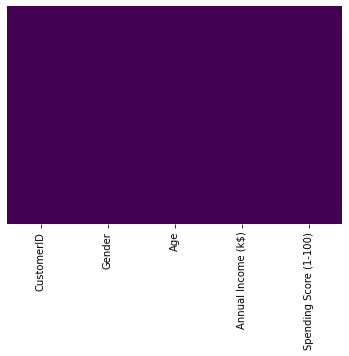

In [8]:
#bird eye view of dataframe and check whether we are having any missing value or not
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [9]:
#compute pairwise correlation of columns excluding null values
data.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


C:\Users\Galika\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

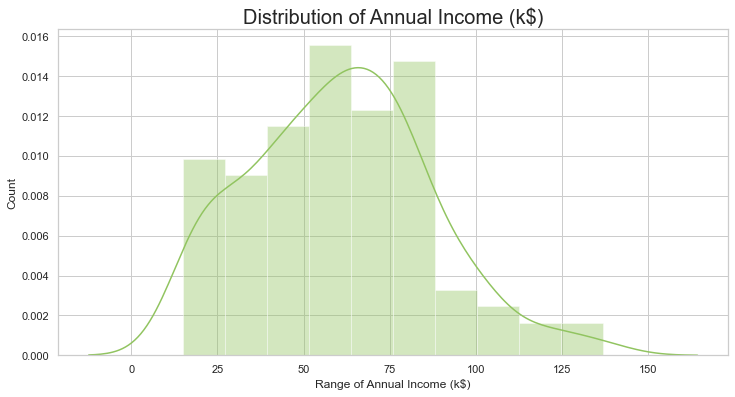

In [10]:
#Distribution of Annnual Income
plt.figure(figsize=(12, 6))
sns.set(style = 'whitegrid')
sns.distplot(data['Annual Income (k$)'], color="#91C460")
plt.title('Distribution of Annual Income (k$)', fontsize = 20)
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Count')

C:\Users\Galika\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

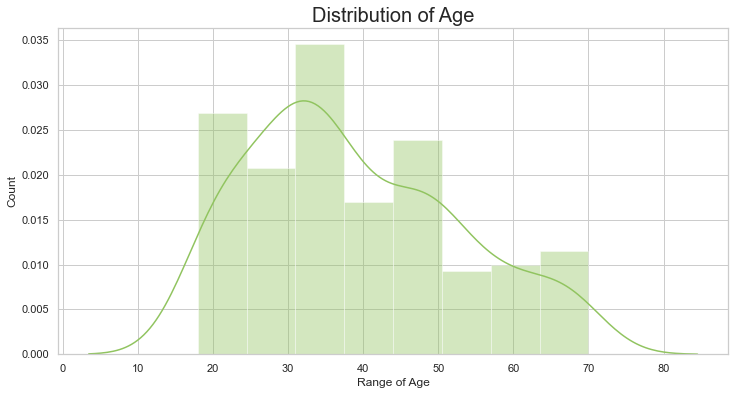

In [11]:
#Distribution of age
plt.figure(figsize=(12, 6))
sns.set(style = 'whitegrid')
sns.distplot(data['Age'], color="#91C460")
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')

C:\Users\Galika\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

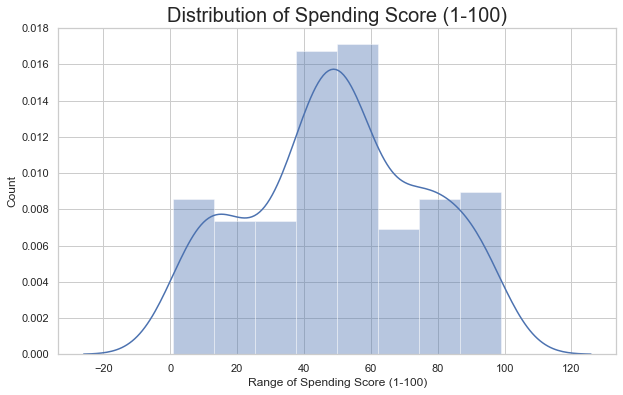

In [12]:
#Distribution of spending score
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(data['Spending Score (1-100)'])
plt.title('Distribution of Spending Score (1-100)', fontsize = 20)
plt.xlabel('Range of Spending Score (1-100)')
plt.ylabel('Count')

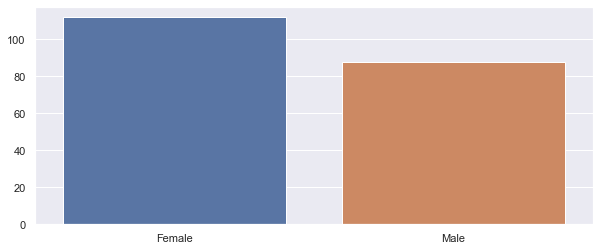

In [13]:
genders = data.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

In [14]:
df1=data[["CustomerID","Gender","Age","Annual Income (k$)","Spending Score (1-100)"]]
X=df1[["Annual Income (k$)","Spending Score (1-100)"]]

In [15]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


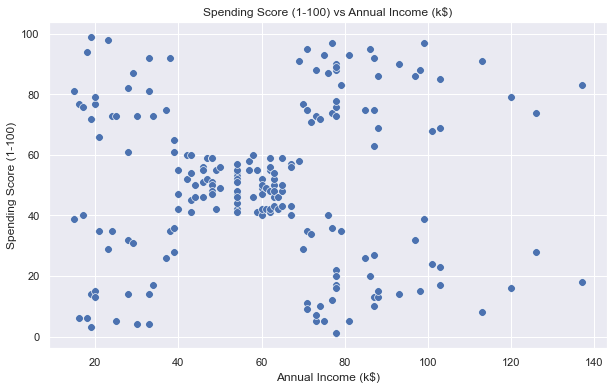

In [16]:
#Scatterplot of the input data
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',  data = X  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

In [17]:
#Import k-means from sklearn
from sklearn.cluster import KMeans

In [18]:
#finding wcss value for different number of clusters

#Within Clusters Sum Of Squares - define the sum of squared distance between each member of cluster and its centroid
WCSS = []

for i in range(1,11):
    k = KMeans(n_clusters = i,init ='k-means++',random_state = 42)
    #compute k-means clustering
    k.fit(X)
    #sum of squared distance of samples to their closest cluster center,weighted by the sample weights provided
    WCSS.append(k.inertia_)


C:\Users\Galika\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


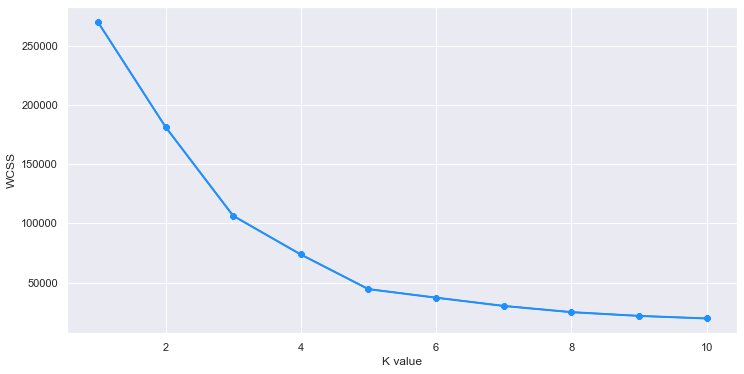

In [19]:
#elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1,11),WCSS)
plt.plot(range(1,11),WCSS, linewidth = 2,color="dodgerblue",marker="8")
plt.xlabel("K value")
#plt.xticks(np.arrange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [20]:
#use no of 5 clusters 
km = KMeans(n_clusters = 5)
#input data fitting
km.fit(X)
#compute cluster centers and predict cluster index for each input data
y = km.predict(X)
#adding labels to a column label
df1["label"] = y
#new dataframe with clustering
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,2
1,2,Male,21,15,81,4
2,3,Female,20,16,6,2
3,4,Female,23,16,77,4
4,5,Female,31,17,40,2


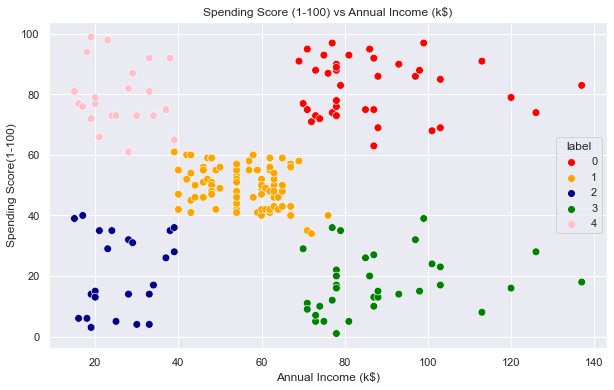

In [21]:
#scatterplot of clusters
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue = 'label',
               palette = ['red','orange','darkblue','green','pink'],legend = 'full',data = df1,s=60)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score(1-100)')
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

C:\Users\Galika\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


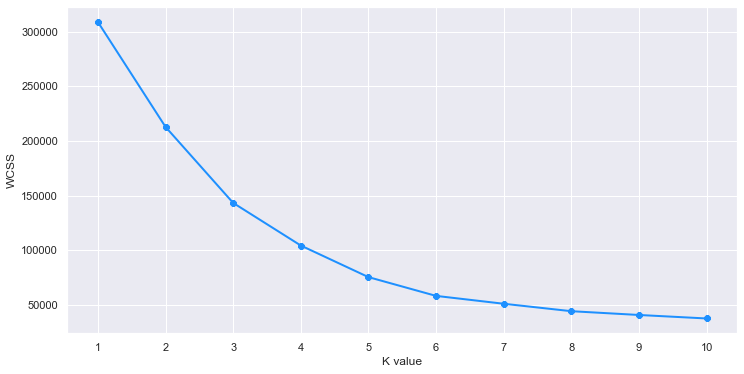

In [22]:
#Taking the features
X2 = df1[["Age","Annual Income (k$)", "Spending Score (1-100)"]]

#For different k values the Within Cluster Sum of Squared Errors (WSS) is calculated
wcss = []

for k in range(1,11):
    kmeans = KMeans(n_clusters = k, init= "k-means++")
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize = (12,6))
plt.plot(range(1,11),wcss, linewidth = 2, color ="dodgerblue", marker = "8")
plt.xlabel("K value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()
             

In [23]:
#The k value which WSS starts to diminish is chosen
km2 = KMeans(n_clusters=5)
y2 = km.fit_predict(X2)
df1["label"] = y2

#The data with labels
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,4
1,2,Male,21,15,81,0
2,3,Female,20,16,6,4
3,4,Female,23,16,77,0
4,5,Female,31,17,40,4


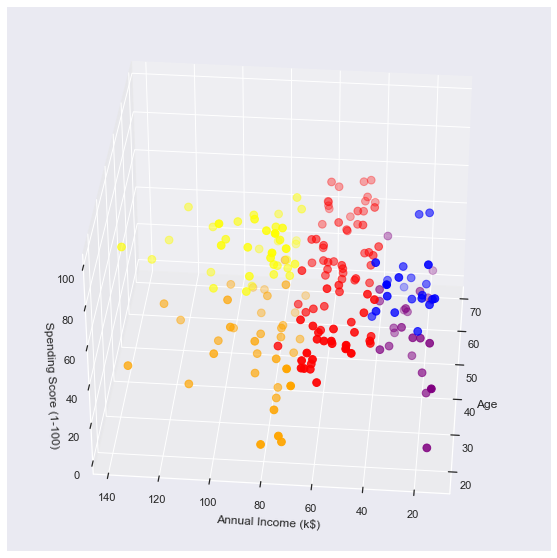

In [24]:
#3D plot of the clustering based on the 3 input features
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df1.Age[df1.label == 0], df1["Annual Income (k$)"][df1.label == 0], df1["Spending Score (1-100)"][df1.label == 0], c='blue', s=60)
ax.scatter(df1.Age[df1.label == 1], df1["Annual Income (k$)"][df1.label == 1], df1["Spending Score (1-100)"][df1.label == 1], c='orange', s=60)
ax.scatter(df1.Age[df1.label == 2], df1["Annual Income (k$)"][df1.label == 2], df1["Spending Score (1-100)"][df1.label == 2], c='red', s=60)
ax.scatter(df1.Age[df1.label == 3], df1["Annual Income (k$)"][df1.label == 3], df1["Spending Score (1-100)"][df1.label == 3], c='yellow', s=60)
ax.scatter(df1.Age[df1.label == 4], df1["Annual Income (k$)"][df1.label == 4], df1["Spending Score (1-100)"][df1.label == 4], c='purple', s=60)
ax.view_init(35, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [25]:
customergroup1=df1[df1["label"]==1]
print('No. of customers in the 1st group=', len(customergroup1))
print('They are -', customergroup1["CustomerID"].values)
print("--------------------------------------------")
customergroup2=df1[df1["label"]==2]
print('No. of customers in the 2nd group=', len(customergroup2))
print('They are -', customergroup2["CustomerID"].values)
print("--------------------------------------------")
customergroup3=df1[df1["label"]==0]
print('No. of customers in the 3rd group=', len(customergroup3))
print('They are -', customergroup3["CustomerID"].values)
print("--------------------------------------------")
customergroup4=df1[df1["label"]==3]
print('No. of customers in the 4th group=', len(customergroup4))
print('They are -', customergroup4["CustomerID"].values)
print("--------------------------------------------")
customergroup5=df1[df1["label"]==4]
print('No. of customers the in 5th group=', len(customergroup5))
print('They are -', customergroup5["CustomerID"].values)
print("--------------------------------------------")

No. of customers in the 1st group= 36
They are - [125 129 131 133 135 137 139 141 145 147 149 151 153 155 157 159 161 163
 165 167 169 171 173 175 177 179 181 183 185 187 189 191 193 195 197 199]
--------------------------------------------
No. of customers in the 2nd group= 80
They are - [ 44  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 127 143]
--------------------------------------------
No. of customers in the 3rd group= 22
They are - [ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 46]
--------------------------------------------
No. of customers in the 4th group= 39
They are - [124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180 182 184 18